In [2]:
!pip install tensorflow_io

  Using cached tensorflow_io-0.31.0-cp39-cp39-win_amd64.whl (22.9 MB)


In [3]:
import tensorflow as tf
import numpy as np
import keras
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import *
from keras.layers import *
from keras.utils import *
from sklearn.preprocessing import *
from sklearn.model_selection import train_test_split
import glob
import os
import librosa
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
import tensorflow_io as tfio
from IPython.display import Audio

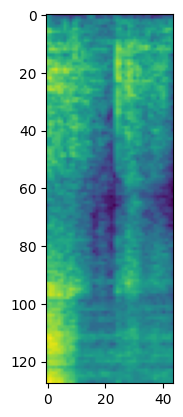

In [4]:
y, sr = librosa.load('data/Ahmed_Gamal.99.mp3')
data = librosa.util.normalize(y)
data = librosa.util.fix_length(data= data, size=sr)
data = librosa.util.normalize(data)
spec = librosa.feature.melspectrogram(y=data, sr=sr, hop_length=512, fmax=8000)
spec_db = librosa.power_to_db(spec, ref= np.max)
plt.imshow(spec_db)
# spec_db.shape

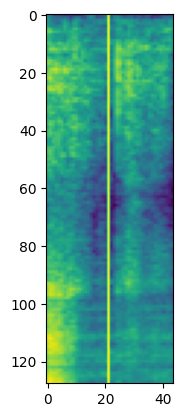

In [5]:
freq_mask = tfio.audio.freq_mask(spec_db, param=10)
plt.imshow(freq_mask)
# freq_mask.numpy().shape

In [6]:
spec_db.shape


(128, 44)

In [7]:
freq_mask.numpy().shape

(128, 44)

In [8]:
glob.glob('data/*')[150].split('.')[0] == 'data\\Ahmed_Abdelhady'

False

In [9]:
def aug(audio):
    y, sr = librosa.load(audio, duration=35)
    data = librosa.util.normalize(y)
    data = librosa.util.fix_length(data= data, size=sr)
    data = librosa.util.normalize(data)
    spec = librosa.feature.melspectrogram(y=data, sr=sr, hop_length=512, fmax=8000)
    spec_db = librosa.power_to_db(spec, ref= np.max)
    freq_mask = tfio.audio.freq_mask(spec_db, param=10)
    return freq_mask.numpy()
def load_data(audio):
    y, sr = librosa.load(audio, duration=35)
    data = librosa.util.normalize(y)
    data = librosa.util.fix_length(data= data, size=sr)
    data = librosa.util.normalize(data)
    spec = librosa.feature.melspectrogram(y=data, sr=sr, hop_length=512, fmax=8000)
    spec_db = librosa.power_to_db(spec, ref= np.max)
    return spec_db
def aug_1(audio):
    y, sr = librosa.load(audio, duration=35)
    data = librosa.util.normalize(y)
    data = librosa.util.fix_length(data= data, size=sr)
    data = librosa.util.normalize(data)
    spec = librosa.feature.melspectrogram(y=data, sr=sr, hop_length=512, fmax=8000)
    spec_db = librosa.power_to_db(spec, ref= np.max)
    time_mask = tfio.audio.time_mask(spec_db, param=10)
    return time_mask.numpy()

dataset = []
aug_dataset = []
dataset_label = []
aug_dataset_label = []
classes = ['Random', 'Ahmed_Gamal', 'Abdallah_Sada', 'Osama', 'Ahmed_Abdelhady',
           'Mostafa_Tharwat', 'Mohamed_Ibrahim', 'Mohamed_Asherf', 'Mohamed_Abdallah',
           'Islam', 'Amira', 'Amal', 'Ahmed_Tarek']
for e, i in enumerate(classes):
    for audio in glob.glob('data/*'):
        if audio.split('.')[0] == f'data\\{i}':
            # print(audio)
            data = load_data(audio)
            data = np.mean(data.T, axis=0)
            dataset.append(data)
            dataset_label.append(e)
            data_aug1 = aug_1(audio)
            data_aug1 = np.mean(data_aug1.T, axis=0)
            aug_dataset.append(data_aug1)
            aug_dataset_label.append(e)
            data_aug = aug(audio)
            data_aug = np.mean(data_aug.T, axis=0)
            aug_dataset.append(data_aug)
            aug_dataset_label.append(e)

In [10]:
data = dataset + aug_dataset
label = dataset_label + aug_dataset_label
df = pd.DataFrame(list(zip(data, label)), columns=['features', 'label'])

In [11]:
df

,features,label
0,"[-44.525974, -43.206474, -41.997448, -43.79642...",0
1,"[-40.28708, -41.700832, -41.568386, -40.68128,...",0
2,"[-38.18774, -39.19572, -38.721176, -39.796978,...",0
3,"[-28.549364, -36.752125, -36.851994, -36.49184...",0
4,"[-28.811028, -36.39247, -35.792255, -37.921284...",0
...,...,...
5878,"[-62.9871, -59.599277, -53.35521, -34.824963, ...",12
5879,"[-56.28777, -54.035374, -48.96198, -24.5815, -...",12
5880,"[-55.12407, -52.90786, -47.849606, -24.117157,...",12
5881,"[-59.901737, -58.330177, -51.85918, -25.442078...",12


In [12]:
df['label'].value_counts()

label
6     459
9     459
4     456
7     456
2     453
0     450
1     450
3     450
5     450
8     450
10    450
11    450
12    450
Name: count, dtype: int64

In [13]:
x = np.array(df['features'].to_list())
y = np.array(df['label'].to_list())
x = np.expand_dims(x, axis=-1)
y = to_categorical(y)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=0, stratify=y)

In [14]:
x[0].shape

(128, 1)

In [15]:
data[0].shape, x.shape

((128,), (5883, 128, 1))

In [16]:
y_train.shape

(4706, 13)

In [17]:
x_train.shape

(4706, 128, 1)

In [18]:
np.array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]).shape

(1, 13)

In [19]:
x_train[0].shape

(128, 1)

In [29]:

# model = Sequential()
# model.add(Dense(256, input_shape= (128,), activation= 'relu'))
# model.add(Dense(128, activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(3, activation='softmax'))
# model.summary()


# model.compile(loss= 'sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
# history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=30, batch_size=8)


input_shape = x_train[0].shape

inputs = Input(shape=input_shape)

x = Conv1D(32, 3, activation='tanh')(inputs)
x = MaxPooling1D(2)(x)
x = Conv1D(64, 3, activation='tanh')(x)
x = MaxPooling1D(2)(x)
x = Conv1D(128, 3, activation='tanh')(x)
x = MaxPooling1D(2)(x)
x = Conv1D(256, 3, activation='tanh')(x)


x = Flatten()(x)
x = Dense(256, activation='relu')(x)
outputs = Dense(13, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 128, 1)]          0         
                                                                 
 conv1d_14 (Conv1D)          (None, 126, 32)           128       
                                                                 
 max_pooling1d_12 (MaxPoolin  (None, 63, 32)           0         
 g1D)                                                            
                                                                 
 conv1d_15 (Conv1D)          (None, 61, 64)            6208      
                                                                 
 max_pooling1d_13 (MaxPoolin  (None, 30, 64)           0         
 g1D)                                                            
                                                                 
 conv1d_16 (Conv1D)          (None, 28, 128)           2470

In [30]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', 'Recall', 'Precision', 'mse'])
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=16)

Epoch 1/10
295/295 [==============================] - 5s 16ms/step - loss: 0.7590 - accuracy: 0.7582 - recall: 0.6893 - precision: 0.9174 - mse: 0.0236 - val_loss: 0.1641 - val_accuracy: 0.9507 - val_recall: 0.9405 - val_precision: 0.9668 - val_mse: 0.0056
Epoch 2/10
295/295 [==============================] - 4s 14ms/step - loss: 0.1150 - accuracy: 0.9645 - recall: 0.9592 - precision: 0.9714 - mse: 0.0041 - val_loss: 0.0825 - val_accuracy: 0.9737 - val_recall: 0.9694 - val_precision: 0.9744 - val_mse: 0.0032
Epoch 3/10
295/295 [==============================] - 4s 15ms/step - loss: 0.0769 - accuracy: 0.9749 - recall: 0.9726 - precision: 0.9776 - mse: 0.0030 - val_loss: 0.1075 - val_accuracy: 0.9635 - val_recall: 0.9609 - val_precision: 0.9683 - val_mse: 0.0042
Epoch 4/10
295/295 [==============================] - 4s 14ms/step - loss: 0.1571 - accuracy: 0.9545 - recall: 0.9535 - precision: 0.9575 - mse: 0.0054 - val_loss: 0.1408 - val_accuracy: 0.9533 - val_recall: 0.9516 - val_precisio

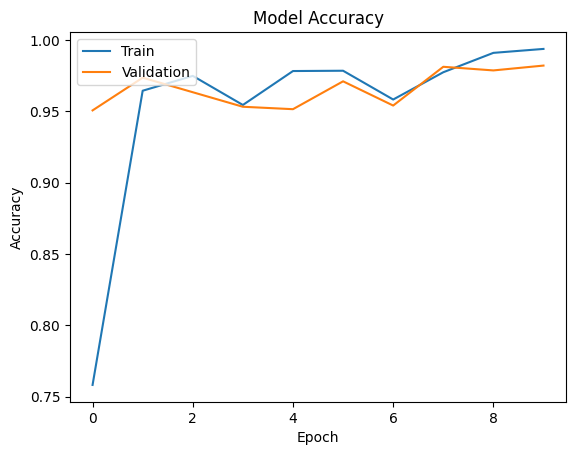

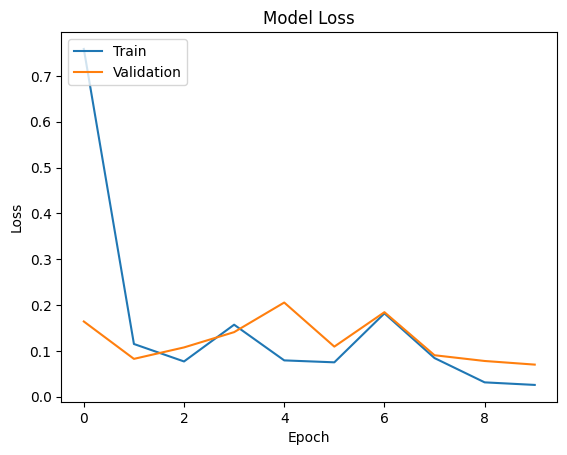

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc= 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc= 'upper left')
plt.show()

In [32]:
pd.DataFrame(history.history)

,loss,accuracy,recall,precision,mse,val_loss,val_accuracy,val_recall,val_precision,val_mse
0,0.759001,0.758181,0.689333,0.917421,0.023604,0.164098,0.950722,0.940527,0.966812,0.005635
1,0.114967,0.964513,0.959201,0.971379,0.004119,0.082490,0.973662,0.969414,0.974381,0.003245
2,0.076860,0.974926,0.972588,0.977574,0.003022,0.107490,0.963466,0.960918,0.968322,0.004220
3,0.157076,0.954526,0.953464,0.957533,0.005428,0.140849,0.953271,0.951572,0.954817,0.005130
4,0.079175,0.978326,0.976838,0.979753,0.002670,0.205453,0.951572,0.949873,0.956373,0.005984
5,0.074944,0.978538,0.978113,0.980614,0.002582,0.109248,0.971113,0.971113,0.972766,0.003621
6,0.181794,0.958351,0.957501,0.960768,0.005156,0.184405,0.954121,0.953271,0.954894,0.005895
7,0.084233,0.977476,0.977263,0.978302,0.002666,0.090411,0.981308,0.981308,0.982979,0.002334
8,0.031236,0.991075,0.991075,0.991497,0.001056,0.077885,0.978760,0.978760,0.978760,0.002588
9,0.025632,0.993838,0.993838,0.993838,0.000806,0.069961,0.982158,0.981308,0.982979,0.002327


In [33]:
model.save('model1.h5')